In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

X, y = load_diabetes(return_X_y = True, as_frame = True)

df = pd.read_csv('winequality-red.csv')
df.drop(df.tail(1100).index, inplace=True)
df.columns = df.columns.str.replace(' ', '_')
y = df['quality']
X = df.drop(columns=['quality', 'fixed_acidity', 'volatile_acidity', 'density'])

X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   citric_acid           499 non-null    float64
 1   residual_sugar        499 non-null    float64
 2   chlorides             499 non-null    float64
 3   free_sulfur_dioxide   499 non-null    float64
 4   total_sulfur_dioxide  499 non-null    float64
 5   pH                    499 non-null    float64
 6   sulphates             499 non-null    float64
 7   alcohol               499 non-null    float64
dtypes: float64(8)
memory usage: 35.1 KB


In [2]:
X

,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
0,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4
1,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8
2,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8
3,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8
4,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...
494,0.23,8.3,0.051,28.0,91.0,3.44,0.55,12.1
495,0.53,2.6,0.070,5.0,16.0,3.15,0.65,11.0
496,0.25,1.9,0.081,14.0,38.0,3.43,0.65,9.0
497,0.32,2.5,0.090,43.0,113.0,3.32,0.79,11.1


In [3]:
from sklearn.cluster import KMeans

models = {}
labels = {}

for col in X.columns:
  model = KMeans(n_clusters = 4) # здесь 4 поставить для лабы
  model.fit(X[[col]])
  centers = model.cluster_centers_.tolist()
  centers = sum(centers, [])
  centers = sorted(centers)
  models[col] = centers
  labels[col] = model.labels_

models

{'citric_acid': [0.05673076923076931,
  0.25553333333333333,
  0.47207999999999994,
  0.6577941176470589],
 'residual_sugar': [1.9290378006872855,
  2.8494152046783627,
  5.866666666666667,
  12.05],
 'chlorides': [0.07820763723150356,
  0.12596923076923075,
  0.3628461538461538,
  0.6105],
 'free_sulfur_dioxide': [7.781746031746047,
  16.74829931972789,
  28.094117647058823,
  45.76666666666666],
 'total_sulfur_dioxide': [24.14977973568278,
  52.86163522012579,
  87.59090909090907,
  127.0851063829787],
 'pH': [3.0539393939393937,
  3.2099435028248586,
  3.3619170984455957,
  3.5615873015873016],
 'sulphates': [0.5743434343434344,
  0.7898742138364779,
  1.0863888888888888,
  1.8057142857142856],
 'alcohol': [9.366523605150215,
  10.152258064516129,
  11.133766233766234,
  12.808823529411764]}

In [4]:
import pandas as pd

X_clust = pd.DataFrame(data = labels)
X_clust.head()

,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
0,0,3,0,0,0,2,2,2
1,0,0,0,1,3,1,2,0
2,0,3,0,2,3,1,2,0
3,3,3,0,2,3,1,2,0
4,0,3,0,0,0,2,2,2


In [5]:
model = KMeans(n_clusters = 4) #здесь тоже 4
model.fit(y.to_frame())
y_centers = sorted(sum(model.cluster_centers_.tolist(), []))
y_labels = model.labels_

y_centers

[3.941176470588235, 5.000000000000001, 5.999999999999999, 7.133333333333333]

In [6]:
!pip install fuzzylogic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from fuzzylogic.functions import S, R, triangular

def make_fuzzy_set(col_min, col_max, center):
  if col_min == center:
    return S(col_min, col_max)
  elif col_max == center:
    return R(col_min, col_max)
  else:
    return triangular(col_min, col_max, c = center)

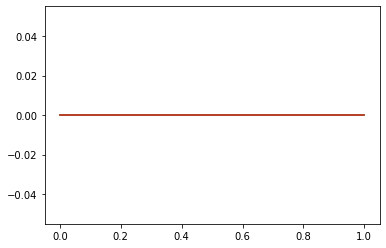

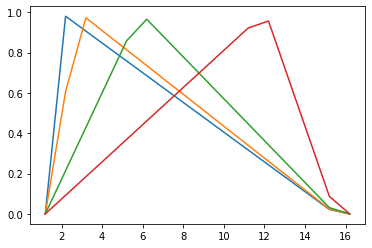

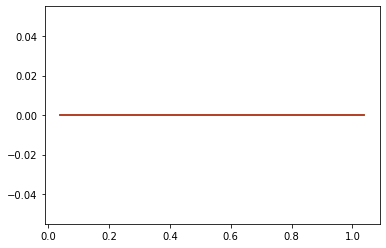

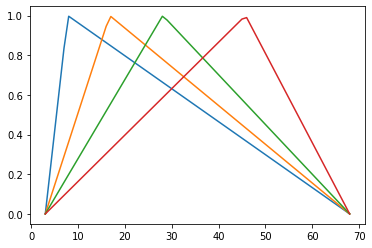

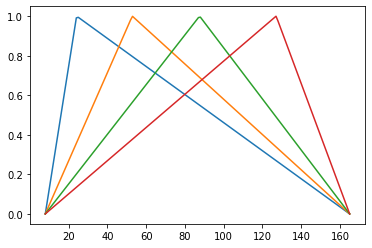

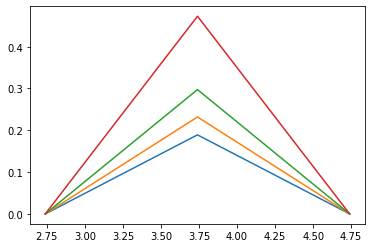

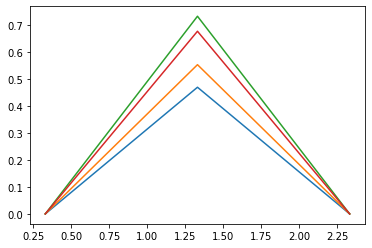

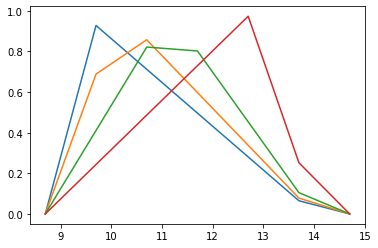

In [8]:
from fuzzylogic.classes import Domain
from matplotlib import pyplot as plt

for key, value in models.items():
  plt.figure()
  X_col = X[key]
  col_min = X_col.min()
  col_max = X_col.max()
  exec(f'{key} = Domain(key, col_min, col_max)')
  for i, rank in enumerate(['very_low', 'low', 'high', 'very_high']):
    exec(f'{key}.{rank} = make_fuzzy_set(col_min, col_max, value[{i}])')
    exec(f'{key}.{rank}.plot()')

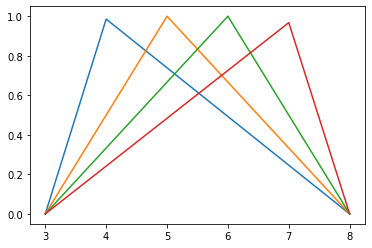

In [9]:
y_min = y.min()
y_max = y.max()

exec(f'{y.name} = Domain(y.name, y_min, y_max)')
for i, rank in enumerate(['very_low', 'low', 'high', 'very_high']):
  exec(f'{y.name}.{rank} = make_fuzzy_set(y_min, y_max, y_centers[{i}])')
  exec(f'{y.name}.{rank}.plot()')


In [10]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_clust, y_labels)
model.feature_log_prob_

array([[-1.77845294, -1.7412236 , -3.09162503, -2.34846743, -2.05926213,
        -2.2333981 , -1.96769494, -1.96353693],
       [-2.00203792, -1.56463977, -2.99175613, -2.45275962, -1.99615555,
        -2.38130066, -1.95874112, -1.89579284],
       [-1.5083418 , -1.77070606, -3.26236094, -2.62637217, -2.30258509,
        -1.93322499, -2.78543686, -1.65292302],
       [-2.59738463, -1.5228699 , -3.62700405, -2.59738463, -1.71008144,
        -2.19191953, -1.77070606, -1.9406051 ]])

In [11]:
from itertools import product

X_comb = []
for comb in product(*len(X_clust.columns)*[[0,1,2,3]]):
  X_comb.append(comb)
X_comb = pd.DataFrame(X_comb, columns = X_clust.columns)

X_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65536 entries, 0 to 65535
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   citric_acid           65536 non-null  int64
 1   residual_sugar        65536 non-null  int64
 2   chlorides             65536 non-null  int64
 3   free_sulfur_dioxide   65536 non-null  int64
 4   total_sulfur_dioxide  65536 non-null  int64
 5   pH                    65536 non-null  int64
 6   sulphates             65536 non-null  int64
 7   alcohol               65536 non-null  int64
dtypes: int64(8)
memory usage: 4.0 MB


In [12]:
preds = model.predict(X_comb)
result = X_comb.copy()
result['label'] = preds
result.to_csv('data_and_labels.csv')

preds[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [13]:
map = { 0: 'very_low',
        1: 'low',
        2: 'high',
        3: 'very_high'}

In [14]:
from fuzzylogic.classes import Rule

rules = []

for i, row in X_comb.iterrows():
  cond = []
  for col in X_comb.columns:
    cond.append('.'.join([col, map[row[col]]]))
  cond = ', '.join(cond)
  cons = '.'.join([y.name, map[preds[i]]])
  rules.append(f'({cond}): {cons}')

rules = eval('Rule({' + ',\n'.join(rules) + ',})')

rules

In [15]:
X_test = X[:200]

values = []
for i, row in X_test.iterrows():
  value = {}
  for col in X_test.columns:
    value[eval(col)] = row[col]
  values.append(value)
values[:5]

[{Domain('citric_acid', 0.0, 1.0, res=1, sets={'very_low': Set(<function triangular.<locals>.f at 0x7fb1d31b9790>), 'low': Set(<function triangular.<locals>.f at 0x7fb1d318bee0>), 'high': Set(<function triangular.<locals>.f at 0x7fb1d319a670>), 'very_high': Set(<function triangular.<locals>.f at 0x7fb1d319adc0>)}): 0.0,
  Domain('residual_sugar', 1.2, 15.5, res=1, sets={'very_low': Set(<function triangular.<locals>.f at 0x7fb1d319eaf0>), 'low': Set(<function triangular.<locals>.f at 0x7fb1d3157280>), 'high': Set(<function triangular.<locals>.f at 0x7fb1d31579d0>), 'very_high': Set(<function triangular.<locals>.f at 0x7fb1d315c160>)}): 1.9,
  Domain('chlorides', 0.039, 0.611, res=1, sets={'very_low': Set(<function triangular.<locals>.f at 0x7fb1d315ce50>), 'low': Set(<function triangular.<locals>.f at 0x7fb1d31125e0>), 'high': Set(<function triangular.<locals>.f at 0x7fb1d3112d30>), 'very_high': Set(<function triangular.<locals>.f at 0x7fb1d31174c0>)}): 0.076,
  Domain('free_sulfur_diox

In [16]:
preds = [rules(x) for x in values]

preds[:10]

[None,
 None,
 4.879374611621307,
 4.83746603449155,
 None,
 None,
 4.849889864156952,
 None,
 4.883526410719204,
 4.852750888496267]

In [17]:
y_test = y[:200]
df_test = pd.DataFrame(data = {'y_pred': preds, 'y_true': y_test})
df_test = df_test.dropna()

df_test

,y_pred,y_true
2,4.879375,5
3,4.837466,6
6,4.849890,5
8,4.883526,7
9,4.852751,5
...,...,...
194,4.858653,5
195,4.838840,5
196,4.846328,5
197,4.841400,6


In [18]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_test['y_true'], df_test['y_pred'])

0.4934795376475747

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)
preds = model.predict(X_test)

mean_squared_error(y_test, preds)

0.3734167796916013